# Data Cleaning & Preprocessing

Environment für dieses Notebook: `ads-ml-light` (*requirements-py3.11-ads-ml-light.txt*).

## Daten einlesen

In [286]:
from pathlib import Path

URL = (
    "https://data.milwaukee.gov/dataset/7a8b81f6-d750-4f62-aee8-30ffce1c64ce/resource/f083631f-e34e-4ad6-aba1-d6d7dd265170/download/2002-2018-property-sales-data.csv"
)
data = Path("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum.csv")

In [287]:
data = Path("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum.csv")

In [6]:
import pandas as pd

data = pd.read_csv("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum.csv") #index_col = "_id", sep=";" data/subset_wohnraum.parquet
data.head(10)

,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price
0,Lg Apartment,3,6974,Apartment: 48: 1-Br Units,1964,35736,0,19100,2002-03,2000000
1,Lg Apartment,9,6970,Apartment: 32: 2-Br Units,1980,31424,0,0,2002-05,1500000
2,Lg Apartment,14,6979,"Apartment: 37: 1-Br ,1: 2-Br Units",1974,27186,0,0,2002-10,1790000
3,Lg Apartment,3,6974,"Apartment: 33: 1-Br ,6: 2-Br Units",1966,32439,0,41715,2003-02,1725000
4,Lg Apartment,9,6970,Apartment: 40: 3-Br Units,1990,48840,0,0,2003-06,2901900
5,Lg Apartment,2,6970,"Apartment: 20: 2-Br ,2: 3-Br Units",1973,0,0,0,2003-08,900000
6,Lg Apartment,2,6967,Apartment: 60: 2-Br Units,1974,68340,0,0,2003-11,2875000
7,Lg Apartment,13,6980,"Apartment: 18: 1-Br ,7: 2-Br Units",1966,20600,0,30000,2003-11,1170000
8,Residential,1,1220,Cape Cod,1951,1620,2,7800,2003-12,148500
9,Residential,13,4660,Ranch,1956,986,1,10428,2003-12,105000


In [7]:
# Nur Wohngebäude: Entfernen aller Commercial und Condomium und Vacant Land  
commercial_styles = ['Commercial', 'Condominium', 'Vacant Land']  # Condominium?
data = data[~data['PropType'].isin(commercial_styles)]

In [8]:
data.tail()

,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price
9598,Lg Apartment,5,6673,Apartment: 8: 2-Br Units,1958,6586,0,9840,2018-12,363000
9599,Lg Apartment,7,6871,"Apartment: 11: 2-Br ,1: 3-Br Units",1966,10932,0,14400,2018-12,485000
9600,Lg Apartment,10,6711,Apartment: 4: 2-Br Units,1978,3600,0,8160,2018-12,142500
9601,Lg Apartment,11,6820,Apartment: 4: 2-Br Units,1959,3754,0,8476,2018-12,260000
9602,Lg Apartment,13,6840,Apartment: 8: 2-Br Units,1961,6528,0,10250,2018-12,525000


In [9]:
data.isna().sum()

PropType      3
District      0
Nbhd          0
Style         0
Year_Built    0
Fin_sqft      0
Fbath         0
Lotsize       0
Sale_date     0
Sale_price    0
dtype: int64

## Target Variable

In [ ]:
price_counts = data["Sale_price"].value_counts()
rare_price = price_counts[price_counts < 100].index.to_list()

In [16]:
print("Es gibt", len(rare_price), "seltene Preise.")
print(rare_price[:10])

Es gibt 1266 seltene Preise.
[170000, 112000, 118000, 128000, 127000, 185000, 119000, 129900, 129000, 148000]


In [17]:
style_counts = data["Style"].value_counts()
rare_style = style_counts[style_counts < 100].index.to_list()

In [18]:
print("Es gibt", len(rare_style), "seltene Stile.")
print(rare_style[:10])

Es gibt 160 seltene Stile.
['Triplex', 'Apartment: 8: 1-Br  Units', 'Bi-Level', 'Apartment:  Units', 'Apartment: 8: 2-Br  Units', 'Apartment: 4: 1-Br  Units', 'Apartment: 4: 3-Br  Units', 'Apartment: 12: 2-Br  Units', 'Apartment: 6: 2-Br  Units', 'Apartment: 24: 2-Br  Units']


In [19]:
data["Style"] = data["Style"].astype("object")

data.loc[data["Style"].isin(rare_style), "Style"] = "rare"

data["Style"] = data["Style"].astype("category")

## Trainings- und Testdaten

In [20]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [21]:
import pandas as pd

train_dist = pd.DataFrame(train_data["Sale_price"].value_counts() / len(train_data))
train_dist.columns = ["Sale_price_train_perc"]

In [24]:
train_dist[:5]

,Sale_price_train_perc
115000,0.019656
125000,0.019005
130000,0.018875
120000,0.017183
140000,0.016272


In [25]:
test_dist = pd.DataFrame(test_data["Sale_price"].value_counts() / len(test_data))
test_dist.columns = ["Sale_price_test_perc"]

In [26]:
dist = train_dist.merge(test_dist, left_index=True, right_index=True)
dist["diff"] = (dist["Sale_price_train_perc"] - dist["Sale_price_test_perc"]).abs()

In [27]:
test_dist[:5]

,Sale_price_test_perc
135000,0.019261
130000,0.019261
120000,0.018740
125000,0.018220
145000,0.016137


In [28]:
dist.sort_values(by="Sale_price_train_perc", ascending=False)[:20]

,Sale_price_train_perc,Sale_price_test_perc,diff
115000,0.019656,0.016137,0.003519
125000,0.019005,0.018220,0.000786
130000,0.018875,0.019261,0.000386
120000,0.017183,0.018740,0.001557
140000,0.016272,0.012493,0.003778
110000,0.015621,0.015096,0.000525
135000,0.015491,0.019261,0.003770
145000,0.015230,0.016137,0.000907
155000,0.014970,0.013014,0.001956
150000,0.014970,0.011973,0.002997


In [30]:
#Entfernen von Ausreißern, die außerhalb des 1. und 99. Perzentils liegen
q_low = data['Sale_price'].quantile(0.01)
q_high = data['Sale_price'].quantile(0.99)

data_filtered = data[(data['Sale_price'] > q_low) & (data['Sale_price'] < q_high)]

In [32]:
data.head(10)

,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price
0,Lg Apartment,3,6974,rare,1964,35736,0,19100,2002-03,2000000
1,Lg Apartment,9,6970,rare,1980,31424,0,0,2002-05,1500000
2,Lg Apartment,14,6979,rare,1974,27186,0,0,2002-10,1790000
3,Lg Apartment,3,6974,rare,1966,32439,0,41715,2003-02,1725000
4,Lg Apartment,9,6970,rare,1990,48840,0,0,2003-06,2901900
5,Lg Apartment,2,6970,rare,1973,0,0,0,2003-08,900000
6,Lg Apartment,2,6967,rare,1974,68340,0,0,2003-11,2875000
7,Lg Apartment,13,6980,rare,1966,20600,0,30000,2003-11,1170000
8,Residential,1,1220,Cape Cod,1951,1620,2,7800,2003-12,148500
9,Residential,13,4660,Ranch,1956,986,1,10428,2003-12,105000


In [34]:
train_data, test_data = train_test_split(
    data_filtered, test_size=0.2, random_state=42
)

In [35]:
# Kategorisierung der Sale_price in Bins basierend auf Quantilen
data_filtered['Sale_price_category'] = pd.qcut(data_filtered['Sale_price'], q=4, labels=False)

# Stratifizierte Aufteilung mit der neuen kategorisierten Variable
train_data, test_data = train_test_split(
    data_filtered, test_size=0.2, random_state=42, stratify=data_filtered['Sale_price_category']
)

/var/folders/7h/9bjpc1ps1yld3ryt3yzwnx7wy15f6s/T/ipykernel_15071/462782624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Sale_price_category'] = pd.qcut(data_filtered['Sale_price'], q=4, labels=False)


In [49]:
 #Sicherstellen, dass Änderungen auf dem ursprünglichen DataFrame angewendet werden
data_filtered.loc[:, 'Sale_price_category'] = pd.qcut(data_filtered['Sale_price'], q=4, labels=False)


In [50]:
data_filtered.head(10)

,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Sale_price_category
0,Lg Apartment,3,6974,rare,1964,35736,0,19100,2002-03,2000000,3
1,Lg Apartment,9,6970,rare,1980,31424,0,0,2002-05,1500000,3
2,Lg Apartment,14,6979,rare,1974,27186,0,0,2002-10,1790000,3
3,Lg Apartment,3,6974,rare,1966,32439,0,41715,2003-02,1725000,3
4,Lg Apartment,9,6970,rare,1990,48840,0,0,2003-06,2901900,3
5,Lg Apartment,2,6970,rare,1973,0,0,0,2003-08,900000,3
6,Lg Apartment,2,6967,rare,1974,68340,0,0,2003-11,2875000,3
7,Lg Apartment,13,6980,rare,1966,20600,0,30000,2003-11,1170000,3
8,Residential,1,1220,Cape Cod,1951,1620,2,7800,2003-12,148500,2
9,Residential,13,4660,Ranch,1956,986,1,10428,2003-12,105000,0


In [46]:
#data_filterd = data

In [51]:
data.head(10)

,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Sale_price_category
0,Lg Apartment,3,6974,rare,1964,35736,0,19100,2002-03,2000000,3
1,Lg Apartment,9,6970,rare,1980,31424,0,0,2002-05,1500000,3
2,Lg Apartment,14,6979,rare,1974,27186,0,0,2002-10,1790000,3
3,Lg Apartment,3,6974,rare,1966,32439,0,41715,2003-02,1725000,3
4,Lg Apartment,9,6970,rare,1990,48840,0,0,2003-06,2901900,3
5,Lg Apartment,2,6970,rare,1973,0,0,0,2003-08,900000,3
6,Lg Apartment,2,6967,rare,1974,68340,0,0,2003-11,2875000,3
7,Lg Apartment,13,6980,rare,1966,20600,0,30000,2003-11,1170000,3
8,Residential,1,1220,Cape Cod,1951,1620,2,7800,2003-12,148500,2
9,Residential,13,4660,Ranch,1956,986,1,10428,2003-12,105000,0


In [52]:
train_data, test_data = train_test_split(
    data, test_size=0.2, random_state=42, stratify=data["Sale_price_category"]
)

In [54]:
train_dist = pd.DataFrame(train_data["Sale_price_category"].value_counts() / len(train_data))
train_dist.columns = ["Sale_price_category_train_perc"]

In [56]:
test_dist = pd.DataFrame(test_data["Sale_price_category"].value_counts() / len(test_data))
test_dist.columns = ["Sale_price_category_test_perc"]

In [57]:
dist = train_dist.merge(test_dist, left_index=True, right_index=True)
dist["diff"] = (dist["Sale_price_category_train_perc"] - dist["Sale_price_category_test_perc"]).abs()

In [58]:
dist.sort_values(by="Sale_price_category_train_perc", ascending=False)[:20]

,Sale_price_category_train_perc,Sale_price_category_test_perc,diff
2,0.252408,0.252473,0.000064
0,0.250716,0.250911,0.000195
1,0.249544,0.249349,0.000195
3,0.247331,0.247267,0.000064


In [237]:
num_features = ["Fbath", "Year_Built", "Fin_sqft"] #Sale_price
cat_features = ["PropType", "District", "Style"] #"Sale_price_category"

y = ["Sale_price_category"]
X = [*num_features, *cat_features]

## Transformationen

### One Hot Encoding

#### "Klassisch" mit Numpy Output

In [240]:
from sklearn.preprocessing import OneHotEncoder

ohe_ft = OneHotEncoder(sparse_output=False).fit_transform(train_data[cat_features])
ohe_ft

,PropType_Lg Apartment,PropType_Residential,PropType_nan,District_1,District_2,District_3,District_4,District_5,District_6,District_7,...,District_14,District_15,Style_Apartment: 4: 2-Br Units,Style_Cape Cod,Style_Colonial,Style_Duplex N/S,Style_Ranch,Style_Split Level,Style_Townhouse,Style_rare
3220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4756,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8263,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5142,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7462,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4512,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8023,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### "Effizient" als Sparse Matrix

In [241]:
ohe_ft = OneHotEncoder(sparse_output=False).fit_transform(train_data[cat_features]) #True 
ohe_ft

,PropType_Lg Apartment,PropType_Residential,PropType_nan,District_1,District_2,District_3,District_4,District_5,District_6,District_7,...,District_14,District_15,Style_Apartment: 4: 2-Br Units,Style_Cape Cod,Style_Colonial,Style_Duplex N/S,Style_Ranch,Style_Split Level,Style_Townhouse,Style_rare
3220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4756,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8263,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5142,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7462,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4512,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8023,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [242]:
print(ohe_ft[:10])

      PropType_Lg Apartment  PropType_Residential  PropType_nan  District_1  \
3220                    0.0                   1.0           0.0         0.0   
4756                    0.0                   1.0           0.0         0.0   
8263                    0.0                   1.0           0.0         0.0   
5142                    1.0                   0.0           0.0         0.0   
7462                    1.0                   0.0           0.0         0.0   
3237                    1.0                   0.0           0.0         0.0   
3790                    0.0                   1.0           0.0         0.0   
3451                    0.0                   1.0           0.0         0.0   
9143                    0.0                   1.0           0.0         0.0   
1345                    0.0                   1.0           0.0         0.0   

      District_2  District_3  District_4  District_5  District_6  District_7  \
3220         0.0         0.0         0.0         0

In [243]:
df_encoded = pd.get_dummies(data_filtered, columns=['Sale_price_category'])
print(df_encoded.columns)

Index(['PropType', 'District', 'Nbhd', 'Style', 'Year_Built', 'Fin_sqft',
       'Fbath', 'Lotsize', 'Sale_date', 'Sale_price', 'Sale_price_category_0',
       'Sale_price_category_1', 'Sale_price_category_2',
       'Sale_price_category_3'],
      dtype='object')


In [244]:
ohe_ft[:10].toarray()

AttributeError: 'DataFrame' object has no attribute 'toarray'

#### Als Pandas Dataframe

In [245]:
from sklearn import set_config

set_config(transform_output="pandas")

In [246]:
ohe_ft = OneHotEncoder(sparse_output=False).fit_transform(X=train_data[cat_features])
ohe_ft.iloc[:, :100]

,PropType_Lg Apartment,PropType_Residential,PropType_nan,District_1,District_2,District_3,District_4,District_5,District_6,District_7,...,District_14,District_15,Style_Apartment: 4: 2-Br Units,Style_Cape Cod,Style_Colonial,Style_Duplex N/S,Style_Ranch,Style_Split Level,Style_Townhouse,Style_rare
3220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4756,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8263,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5142,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7462,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4512,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8023,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Kombinierte Transformationen

In [247]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    remainder="drop",
    transformers=[
        ("std_scaler", StandardScaler(), num_features),
        ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), cat_features),
    ],
)

In [248]:
ct

ColumnTransformer(transformers=[('std_scaler', StandardScaler(),
                                 ['Fbath', 'Year_Built', 'Fin_sqft']),
                                ('ohe',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['PropType', 'District', 'Style'])])

In [249]:
ct_transformed = ct.fit_transform(X=train_data[X])
ct_transformed

,std_scaler__Fbath,std_scaler__Year_Built,std_scaler__Fin_sqft,ohe__PropType_Lg Apartment,ohe__PropType_Residential,ohe__PropType_nan,ohe__District_1,ohe__District_2,ohe__District_3,ohe__District_4,...,ohe__District_14,ohe__District_15,ohe__Style_Apartment: 4: 2-Br Units,ohe__Style_Cape Cod,ohe__Style_Colonial,ohe__Style_Duplex N/S,ohe__Style_Ranch,ohe__Style_Split Level,ohe__Style_Townhouse,ohe__Style_rare
3220,2.540241,-0.626026,-0.068527,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4756,1.019738,-0.080817,-0.177036,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8263,1.019738,1.165375,-0.032206,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5142,-2.021267,-0.158704,0.319199,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7462,-2.021267,0.074957,0.237931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,1.019738,-0.548139,-0.024488,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4512,1.019738,-0.703913,-0.155395,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8366,-0.500764,0.775940,-0.142077,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8023,-0.500764,-0.470252,-0.160237,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Zwischenergebnis (Decision Tree Classifier)

In [250]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42, min_samples_split=20)

### Cross Validation

In [251]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=clf, X=ct.fit_transform(train_data[X]), y=train_data[y], cv=5)

array([0.48536109, 0.48796357, 0.48177083, 0.47981771, 0.47916667])

### Test Score

In [252]:
clf.fit(X=ct.transform(train_data[X]), y=train_data[y])

DecisionTreeClassifier(min_samples_split=20, random_state=42)

Mean accuracy

In [253]:
clf.score(X=ct.transform(test_data[X]), y=test_data[y])

0.504424778761062

F1 score

In [254]:
from sklearn.metrics import f1_score

y_pred = clf.predict(ct.transform(test_data[X]))
f1_score(y_true=test_data[y], y_pred=y_pred, average="macro")

0.5037490022082222

Auswahl der Features muss verbessert werden. Neue Features sollten berechnet und eingeführt werden, damit das Modell besser performt. Mit 0,5 Mean Accuracy ist es reiner Zufall, ob die ausgewählten Features den Preis vorhersagen können.  

In [ ]:
Ansatz für neues Feature - Wird im nächsten Notebook besser aufgegriffen - hier erster Ansatz (wurde verforfen)

In [255]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, luxury_threshold=2484):
        # Setzt den Schwellenwert für Premium Immobilien
        self.luxury_threshold = luxury_threshold
        self.feature_names_in_ = None

    def fit(self, X, y=None):
        # Passt den Transformer an die Daten an, ohne Änderungen vorzunehmen
        return self

    def transform(self, X):
        df = X.copy()
        self.feature_names_in_ = df.columns.tolist()
        
        # Berechnet das "Premium_Segment" Feature basierend auf 'Fin_sqft' und 'PropType'
        if 'Fin_sqft' in df.columns and 'PropType' in df.columns:
            Premium_Segment = (df['Fin_sqft'] > self.luxury_threshold) & df['PropType'].isin(['Lg Apartment', 'Residential']).astype(int)
        else:
            # Fallback, falls die erforderlichen Spalten nicht vorhanden sind
            Premium_Segment = np.zeros(len(df), dtype=int)
        
        # Fügt das 'Premium_Segment' Feature als neue Spalte hinzu
        return np.c_[X, Premium_Segment]

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            input_features = self.feature_names_in_
        # Fügt den neuen Feature-Namen 'premium_segment' hinzu
        return np.array([*input_features, "Premium_Segment"])

In [ ]:
'''import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin


class CombinedFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names_in_ = None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        self.feature_names_in_ = df.columns.tolist()
        # volume as a sphere
        # volume = (4 / 3) * np.pi * pow(df["kr_durchm"] / 2, 3)
        # volume as a cylinder
        volume = np.pi * pow(df["Style"] / 2, 2) * df["Lotsize"]

        return np.c_[X, volume]

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            input_features = self.feature_names_in_
        return np.array([*input_features, "cfa_volume"])'''

In [216]:
data.head(10)

,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Sale_price_category
0,Lg Apartment,3,6974,rare,1964,35736,0,19100,2002-03,2000000,3
1,Lg Apartment,9,6970,rare,1980,31424,0,0,2002-05,1500000,3
2,Lg Apartment,14,6979,rare,1974,27186,0,0,2002-10,1790000,3
3,Lg Apartment,3,6974,rare,1966,32439,0,41715,2003-02,1725000,3
4,Lg Apartment,9,6970,rare,1990,48840,0,0,2003-06,2901900,3
5,Lg Apartment,2,6970,rare,1973,0,0,0,2003-08,900000,3
6,Lg Apartment,2,6967,rare,1974,68340,0,0,2003-11,2875000,3
7,Lg Apartment,13,6980,rare,1966,20600,0,30000,2003-11,1170000,3
8,Residential,1,1220,Cape Cod,1951,1620,2,7800,2003-12,148500,2
9,Residential,13,4660,Ranch,1956,986,1,10428,2003-12,105000,0


## Multi-step Pipeline

In [256]:
data.head(10)

,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Sale_price_category
0,Lg Apartment,3,6974,rare,1964,35736,0,19100,2002-03,2000000,3
1,Lg Apartment,9,6970,rare,1980,31424,0,0,2002-05,1500000,3
2,Lg Apartment,14,6979,rare,1974,27186,0,0,2002-10,1790000,3
3,Lg Apartment,3,6974,rare,1966,32439,0,41715,2003-02,1725000,3
4,Lg Apartment,9,6970,rare,1990,48840,0,0,2003-06,2901900,3
5,Lg Apartment,2,6970,rare,1973,0,0,0,2003-08,900000,3
6,Lg Apartment,2,6967,rare,1974,68340,0,0,2003-11,2875000,3
7,Lg Apartment,13,6980,rare,1966,20600,0,30000,2003-11,1170000,3
8,Residential,1,1220,Cape Cod,1951,1620,2,7800,2003-12,148500,2
9,Residential,13,4660,Ranch,1956,986,1,10428,2003-12,105000,0


In [257]:
from sklearn.pipeline import Pipeline

num_step = Pipeline(
    steps=[
        ("attr_add", CombinedFeatureAdder()),
        ("std_scaler", StandardScaler()),
    ]
)

In [258]:
prep_steps = ColumnTransformer(
    transformers=[
        ("num", num_step, num_features),
        ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), cat_features),
    ],
    remainder="drop",
)

In [259]:
pipeline = Pipeline(
    steps=[
        ("preprocessing", prep_steps),
        ("model", DecisionTreeClassifier(random_state=42, min_samples_split=20)),
    ]
)

In [260]:
data.columns

Index(['PropType', 'District', 'Nbhd', 'Style', 'Year_Built', 'Fin_sqft',
       'Fbath', 'Lotsize', 'Sale_date', 'Sale_price', 'Sale_price_category'],
      dtype='object')

In [261]:
print(train_data.columns)

Index(['PropType', 'District', 'Nbhd', 'Style', 'Year_Built', 'Fin_sqft',
       'Fbath', 'Lotsize', 'Sale_date', 'Sale_price', 'Sale_price_category'],
      dtype='object')


In [262]:
pipeline.fit(X=train_data[X], y=train_data[y])

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('attr_add',
                                                                   CombinedFeatureAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Fbath', 'Year_Built',
                                                   'Fin_sqft']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['PropType', 'District',
                                                   'Style'])])),
                ('model',
                 DecisionTreeClassifier(min_samples_split=20,
                                        random_state=42))])

In [263]:
cross_val_score(estimator=pipeline, X=train_data[X], y=train_data[y], cv=5)

array([0.48275862, 0.48536109, 0.48046875, 0.48177083, 0.48046875])

In [264]:
pipeline.score(X=test_data[X], y=test_data[y])

0.5033836543466944

In [265]:
pipeline[:-1].get_feature_names_out()

array(['num__Fbath', 'num__Year_Built', 'num__Fin_sqft',
       'num__Premium_Segment', 'ohe__PropType_Lg Apartment',
       'ohe__PropType_Residential', 'ohe__PropType_nan',
       'ohe__District_1', 'ohe__District_2', 'ohe__District_3',
       'ohe__District_4', 'ohe__District_5', 'ohe__District_6',
       'ohe__District_7', 'ohe__District_8', 'ohe__District_9',
       'ohe__District_10', 'ohe__District_11', 'ohe__District_12',
       'ohe__District_13', 'ohe__District_14', 'ohe__District_15',
       'ohe__Style_Apartment: 4: 2-Br  Units', 'ohe__Style_Cape Cod',
       'ohe__Style_Colonial', 'ohe__Style_Duplex N/S', 'ohe__Style_Ranch',
       'ohe__Style_Split Level', 'ohe__Style_Townhouse',
       'ohe__Style_rare'], dtype=object)

## Dimensionsreduktion

Zur Veranschaulichung der Features wird das Ergebnis der Transformation mit One-Hot-Encoding dargestellt.

In [266]:
steps = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(sparse_output=False), cat_features),
    ]
)

In [267]:
steps.fit_transform(X=train_data[cat_features])

,ohe__PropType_Lg Apartment,ohe__PropType_Residential,ohe__PropType_nan,ohe__District_1,ohe__District_2,ohe__District_3,ohe__District_4,ohe__District_5,ohe__District_6,ohe__District_7,...,ohe__District_14,ohe__District_15,ohe__Style_Apartment: 4: 2-Br Units,ohe__Style_Cape Cod,ohe__Style_Colonial,ohe__Style_Duplex N/S,ohe__Style_Ranch,ohe__Style_Split Level,ohe__Style_Townhouse,ohe__Style_rare
3220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4756,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8263,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5142,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7462,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4512,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8023,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Dimensionen der kategorischen Spalten nach der Transformation

In [268]:
pre_transform = train_data[cat_features].shape[1]
after_transform = steps.transform(X=train_data[cat_features]).shape[1]

In [269]:
print(f"Vor der Transformation gab es {pre_transform} Features, danach {after_transform}!")

Vor der Transformation gab es 3 Features, danach 26!


Die nun hohe Anzahl neuer Features soll reduziert werden reduzieren.

## PCA

### Wie viele Komponenten?

In [270]:
from sklearn.decomposition import PCA

components_evaluation = 11
pca = PCA(n_components=components_evaluation)
pca.fit_transform(X=steps.fit_transform(train_data[cat_features]))

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
3220,0.382371,0.198061,0.319633,0.130874,0.598081,-0.342676,0.834648,0.129475,-0.265077,0.837894,0.055960
4756,-0.753791,0.449273,-0.383516,-0.046486,-0.093496,-0.042647,-0.040976,0.009622,0.004912,0.009320,-0.007549
8263,0.264844,-0.014511,0.901347,-0.271640,0.419928,-0.505612,-0.782811,0.090646,-0.010711,0.006848,0.018457
5142,0.437328,0.386198,0.687395,1.063325,-0.438161,0.163872,0.182386,0.405686,-0.646970,-0.594420,0.999387
7462,0.151314,1.081021,0.199280,0.938360,-0.612435,-0.088256,-0.145162,-0.130924,-0.009068,-0.068379,1.055000
...,...,...,...,...,...,...,...,...,...,...,...
6373,0.645976,-0.367329,-0.246539,0.371315,0.418344,-0.719441,0.556486,-0.295081,0.065078,0.011985,0.010270
4512,1.060244,-0.345480,-0.484769,-0.200467,-0.199043,0.089181,-0.041471,-0.096882,-0.013735,-0.042505,-0.003130
8366,-0.540433,-0.309004,0.162843,0.141782,0.410360,0.742898,0.089012,-0.379051,0.031729,-0.025214,0.029793
8023,-0.170434,-0.796137,-0.476081,0.257594,-0.113206,-0.123412,-0.023940,0.020925,0.014379,0.022289,-0.004050


In [271]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.22804446, 0.38953911, 0.51822024, 0.62729485, 0.70275257,
       0.77286321, 0.82474627, 0.86442369, 0.89535468, 0.92407391,
       0.94223478])

In [272]:
variance_aim = 0.90 
components_aim = np.argmax(cumsum >= variance_aim) + 1
components_aim

10

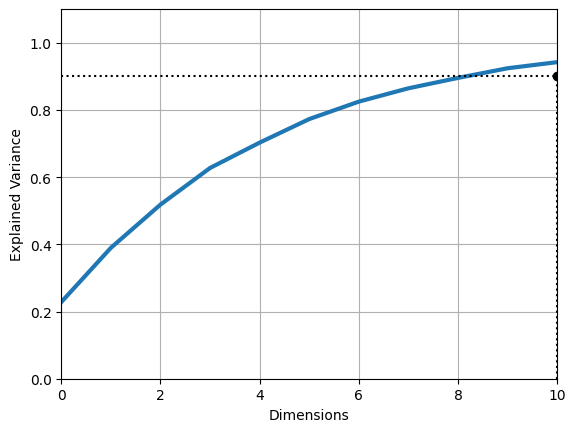

In [273]:
import matplotlib.pyplot as plt

plt.plot(cumsum, linewidth=3)
plt.axis([0, components_evaluation - 1, 0, 1.1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([components_aim, components_aim], [0, variance_aim], "k:")
plt.plot([0, components_aim], [variance_aim, variance_aim], "k:")
plt.plot(components_aim, variance_aim, "ko")
plt.grid(visible=True)
plt.show()

In [274]:
print(
    f"Erklärte Varianz mit {components_evaluation} Komponenten: {np.sum(pca.explained_variance_ratio_)}"
)
print(
    f"Erklärte Varianz mit {components_aim} Komponenten: {np.sum(pca.explained_variance_ratio_[:components_aim])}"
)

Erklärte Varianz mit 11 Komponenten: 0.9422347794401235
Erklärte Varianz mit 10 Komponenten: 0.924073913043941


### PCA Pipeline Step

In [275]:
num_step_2 = Pipeline(
    steps=[
        ("attr_add", CombinedFeatureAdder()),
        ("std_scaler", StandardScaler()),
    ]
)

In [276]:
prep_steps_2 = ColumnTransformer(
    transformers=[
        ("num", num_step_2, num_features),
        ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), cat_features),
    ],
    remainder="drop",
)

In [277]:
ohe_cols_2 = prep_steps_2.fit_transform(X=train_data).columns.str.startswith("ohe")
ohe_cols_2

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [278]:
ct_pca_2 = ColumnTransformer(
    remainder="passthrough", transformers=[("pca", PCA(n_components=components_aim), ohe_cols_2)]
)

In [279]:
prep_2 = Pipeline(
    steps=[
        ("preprocessing", prep_steps_2),
        ("ct_pca", ct_pca_2),
    ]
)

In [280]:
pipeline_2 = Pipeline(
    steps=[
        ("prep", prep_2),
        ("model", DecisionTreeClassifier(random_state=42, min_samples_split=20)),
    ]
)

In [281]:
pipeline_2.fit(X=train_data[X], y=train_data[y])

Pipeline(steps=[('prep',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('attr_add',
                                                                                    CombinedFeatureAdder()),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['Fbath',
                                                                    'Year_Built',
                                                                    'Fin_sqft']),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   ['PropType',
                                                                    'District',
                                                                    'Style'])])),
                                 ('ct_pca',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pca',
                                                                   PCA(n_components=10),
                                                                   array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True]))]))])),
                ('model',
                 DecisionTreeClassifier(min_samples_split=20,
                                        random_state=42))])

In [282]:
cross_val_score(
    estimator=pipeline_2[-1], X=prep_2.fit_transform(train_data[X]), y=train_data[y], cv=5
)

array([0.46063761, 0.49902407, 0.47200521, 0.50065104, 0.4921875 ])

Mean accuracy

In [283]:
pipeline_2.score(X=test_data[X], y=test_data[y])

0.48308172826652784

F1 Score

In [284]:
f1_score(y_true=test_data[y], y_pred=pipeline_2.predict(X=test_data[X]), average="macro")

0.4843229469043275